   In this exercise, we are continuing digit handwriting recognition through MNIST dataset with advanced features of TensorFlow: [tensorboard](https://www.tensorflow.org/tensorboard/get_started) and transfer learning.

In [1]:
%load_ext tensorboard

In [2]:
import numpy as np
import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

NUM_OF_CLASSES = 10

In [3]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, NUM_OF_CLASSES)
y_test = to_categorical(y_test, NUM_OF_CLASSES)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    
#     Dense(200, activation='relu', input_shape=(28, 28)),
#     Flatten(),
#     Dense(150, activation='relu'),
#     Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
# opt = Adam(lr=0.005) 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Create a tensorboard_callback and pass it to model.fit.

In [7]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [8]:
history = model.fit(x=x_train, y=y_train, batch_size=28, epochs=5,
                    validation_data=(x_test, y_test),
                    callbacks=[tensorboard_callback])

Epoch 1/5
   1/2143 [..............................] - ETA: 0s - loss: 2.5282 - accuracy: 0.0357WARNING:tensorflow:From d:\workplace\changsin\deeplearning-101\venv\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2143/2143 [==============================] - 9s 4ms/step - loss: 0.2158 - accuracy: 0.9358 - val_loss: 0.1005 - val_accuracy: 0.9699
Epoch 2/5
2143/2143 [==============================] - 8s 4ms/step - loss: 0.0948 - accuracy: 0.9701 - val_loss: 0.0788 - val_accuracy: 0.9749
Epoch 3/5
2143/2143 [==============================] - 10s 5ms/step - loss: 0.0695 - accuracy: 0.9779 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 4/5
2143/2143 [==============================] - 12s 6ms/step - loss: 0.0549 - accuracy: 0.9822 - val_loss: 0.0631 - val_accuracy: 0.9806
Epoch 5/5
2143/2143 [==================

In [9]:
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2020-09-28 10:00:32.307443: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-09-28 10:00:32.307689: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "C:\Users\chang\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\chang\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\workplace\changsin\DeepLearning-101\venv\Scripts\tensorboard.exe\__main__.py", line 9, in <module>
  File "d:\workplace\changsin\deeplearning-101\venv\lib\site-packages\tensorboard\main.py", line 65, in run_main
    default.get_plugins(),
  File "d:\workplace\changsin\deeplearning

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0794 - accuracy: 0.9765


[0.07936488837003708, 0.9764999747276306]

In [11]:
model.save('./mnist-weights.hd5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./mnist-weights.hd5\assets


In [12]:
CLASSES = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

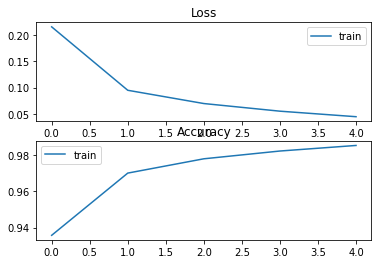

In [13]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# plot mse during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

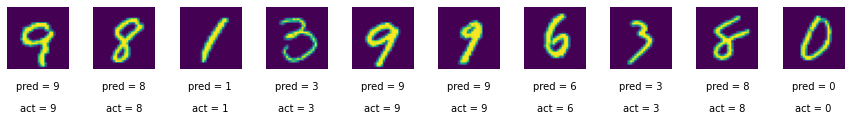

In [14]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)